In [29]:
import pandas as pd
import numpy as np
import os, sys, subprocess,time
from osgeo import gdal
import geopandas as gpd
from pyproj import CRS
from shapely.ops import unary_union, polygonize
from rtree import index
from shapely.geometry import Polygon
from sklearn.cluster import DBSCAN
import rasterio
#import rasterstats as rs
import glob
from shapely.affinity import rotate
from shapely.geometry import LineString, Point, MultiPolygon,MultiLineString 
from shapely.ops import unary_union, polygonize
from geopandas import overlay
import shapely.wkt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib_scalebar.scalebar import ScaleBar

Importing the powerline shape file (or geojson format)

In [30]:
df = gpd.read_file("D:\\lila visuals\\osm_powline_11.776643009779821_10.743913945502888_80.19273383153288_79.14689901832789-line.shp")

In [31]:
df = df.to_crs(epsg = 4326)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cables      192 non-null    object  
 1   power       196 non-null    object  
 2   voltage     191 non-null    object  
 3   note        2 non-null      object  
 4   building    0 non-null      object  
 5   operator    0 non-null      object  
 6   substation  0 non-null      object  
 7   frequency   0 non-null      object  
 8   location    0 non-null      object  
 9   generator_  0 non-null      object  
 10  name        0 non-null      object  
 11  plant_meth  0 non-null      object  
 12  plant_outp  0 non-null      object  
 13  plant_sour  0 non-null      object  
 14  plant_type  0 non-null      object  
 15  source      0 non-null      object  
 16  alt_name    0 non-null      object  
 17  landuse     0 non-null      object  
 18  wikidata    0 non-null      object  
 19  

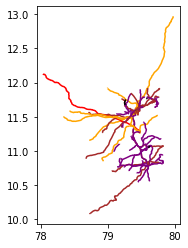

In [32]:
df.plot(color = df["color"])
plt.show()

Importing the district shape file (Nagapattinam shape file)

In [33]:
df1 = gpd.read_file("D:\\LILA\\Nagapattinam_proj32644.shp")
df1 = df1.to_crs(epsg =4326)
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA        1 non-null      float64 
 1   PERIMETER   1 non-null      float64 
 2   DISTRICT_   1 non-null      int64   
 3   DISTRICT_I  1 non-null      int64   
 4   DCODE       1 non-null      object  
 5   DISTRICT    1 non-null      object  
 6   SCODE       1 non-null      object  
 7   STATE       1 non-null      object  
 8   SDCODE      1 non-null      object  
 9   AREAHA      1 non-null      float64 
 10  geometry    1 non-null      geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 216.0+ bytes


<AxesSubplot:>

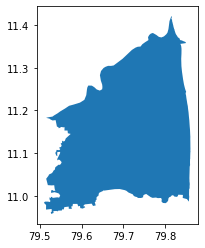

In [34]:
df1.plot()

Merging the powerline shape and district shape file

In [35]:
merge = overlay(df, df1, how='intersection')
merge = merge.to_crs(epsg =4326)
merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cables      25 non-null     object  
 1   power       25 non-null     object  
 2   voltage     24 non-null     object  
 3   note        0 non-null      object  
 4   building    0 non-null      object  
 5   operator    0 non-null      object  
 6   substation  0 non-null      object  
 7   frequency   0 non-null      object  
 8   location    0 non-null      object  
 9   generator_  0 non-null      object  
 10  name        0 non-null      object  
 11  plant_meth  0 non-null      object  
 12  plant_outp  0 non-null      object  
 13  plant_sour  0 non-null      object  
 14  plant_type  0 non-null      object  
 15  source      0 non-null      object  
 16  alt_name    0 non-null      object  
 17  landuse     0 non-null      object  
 18  wikidata    0 non-null      object  
 19  ba

importing substation shape and overlaying with district shape file

In [36]:
df2 = gpd.read_file("D:\\lila visuals\\list_substation_TN_corr.shp")
df2 = df2.to_crs(epsg = 4326)
intersection = overlay(df2, df1, how='intersection')

Plotting the powerline visuals with the help of the imported shape file and the base map is nagapattinam shape file.


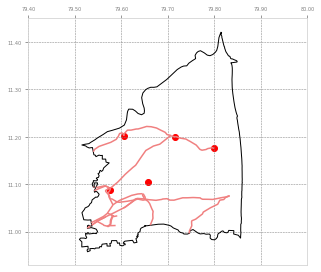

In [92]:
ax = df1.plot(figsize=(5,5),color="none",zorder=2)
x = merge.plot(color="lightcoral",ax =ax) #powerline inside the district
y = intersection.plot(color="red",ax=ax)  #substation data points inside the district
ax.xaxis.tick_top() #making the x-axis scaling in the above
plt.xlim(79.40,80.00) #setting limit for x axis
plt.ylim(10.93,11.45) #setting limit for y axis 
plt.grid(color="grey",linestyle = '--', linewidth = 0.5) #creating the grid 
# plt.legend(loc='lower right') 
ax.tick_params(axis='x', colors='grey') #coloring the axis values 
ax.tick_params(axis='y', colors='grey')
# ax.add_artist(ScaleBar(1)) #adding the scale bar 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f')) #axis value formatting for both axis
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.tick_params(axis='x', labelsize=5)  #reducing the size of the axis values
ax.tick_params(axis='y', labelsize=5)
# x1, y1, arrow_length = 0.9, 0.9, 0.1   #creating a north arrow
# ax.annotate('N', xy=(x1, y1), xytext=(x1, y1-arrow_length),
#             arrowprops=dict(facecolor='none', width=5, headwidth=12),
#             ha='center', va='center', fontsize=10,
#             xycoords=ax.transAxes)
ax.spines['bottom'].set_color('lightgrey') #changing the boundary colour
ax.spines['top'].set_color('lightgrey') 
ax.spines['right'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
plt.savefig("powerlines.jpg",dpi =1500) #saving the picture in high quality
plt.show()

In [84]:
intersection.head()

,Name of th,Voltage ra,Capacity i,Date of Co,AREA,PERIMETER,DISTRICT_,DISTRICT_I,DCODE,DISTRICT,SCODE,STATE,SDCODE,AREAHA,geometry
0,Kadalangudy,110/11,1x16,25.01.02,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,POINT (79.57505 11.08840)
1,Manalmedu,110/33-11,"1x10, 2X10",17.02.88,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,POINT (79.60593 11.20177)
2,Mayiladuthurai,110/33-11,"1x10+1X16, 2x16",07.10.79,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,POINT (79.65633 11.10438)
3,Thiruvengadu,110/11,1x10,31.03.03,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,POINT (79.79977 11.17567)
4,Vaitheeswarankoil,110/33-11,1x16+1x16,14.12.01,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,POINT (79.71628 11.19915)


Cutting the raster for a particular district

In [40]:
# data1 = "D:\\lila visuals\\DEM_T44PLT_proj32644_filled_slope.tif"
# data2 = "D:\\lila visuals\\DEM_T44PLT_proj32644_filled_slope - Copy (2).tif"

In [41]:
# df = pd.DataFrame()   
# for j in range(len(df1)):  #df1 is nagapattinam district shape file 
#     input_shp = "D:\\lila visuals\\new.shp"

#     selection = df1.geometry[j:j+1]
#     if selection.geometry.is_empty.bool():
#         rasterarr = []
#     else:
#         selection.to_file(input_shp)
            
#         #first for LandUse raster 
#         input_raster= data1
    
#         output_raster = data2
            
#     ds = gdal.Warp(data2,
#                           data1,
#                           format = 'GTiff',
#                           cutlineDSName = input_shp,
#                           cropToCutline=True,
#                           )
#     ds = None
            
#     raster = gdal.Open(data2, gdal.GA_ReadOnly)
#     lcarr = raster.ReadAsArray()
#             #remove nodata values
#     lcarrorig = lcarr.reshape(lcarr.size,1)
#     lcarrND = lcarr[lcarr!=-9999]

#     if (np.size(lcarrND)==0):
#                df.at[j, "ToTVegPix"]=0
#                df.at[j, "ToTPix"]=0
#                df.at[j, "ToTVegAr%"]=0
       
               
#     else:    
                
                  
#         veg_sum = len(lcarrND[(lcarrND==3)])
               
                
               
#         df.at[j, "ToTVegPix"]=veg_sum
#         df.at[j, "ToTPix"]=np.size(lcarrorig)
#         df.at[j, "ToTVegAr%"]=100*veg_sum/(np.size(10))
                        
       
                   
# df1 = pd.concat([df1, df], axis = 1)
    
    
# geometry = df1["geometry"].astype(str).map(shapely.wkt.loads) 

# df1 = gpd.GeoDataFrame(df1, crs="EPSG:"+str(4326), geometry=geometry)
    
    
    
#     # df2 = df2.to_crs(epsg=4326)

importing the edges shape file (primary and secondary roads)

<AxesSubplot:>

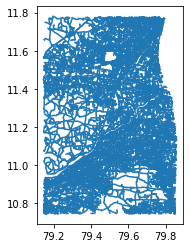

In [42]:
data = gpd.read_file("D:\\lila visuals\\edges.shp")
data = data.to_crs(epsg =4326)
data.plot()

In [43]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 145510 entries, 0 to 145509
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   u         145510 non-null  int64   
 1   v         145510 non-null  int64   
 2   key       145510 non-null  int64   
 3   osmid     145510 non-null  object  
 4   highway   145510 non-null  object  
 5   oneway    145510 non-null  int64   
 6   length    145510 non-null  float64 
 7   from      145510 non-null  int64   
 8   to        145510 non-null  int64   
 9   bridge    1879 non-null    object  
 10  ref       11007 non-null   object  
 11  name      15152 non-null   object  
 12  lanes     2152 non-null    object  
 13  tunnel    37 non-null      object  
 14  maxspeed  1658 non-null    object  
 15  service   268 non-null     object  
 16  width     184 non-null     object  
 17  junction  202 non-null     object  
 18  access    162 non-null     object  
 19  geometry  14551

In [44]:
data.head()

,u,v,key,osmid,highway,oneway,length,from,to,bridge,ref,name,lanes,tunnel,maxspeed,service,width,junction,access,geometry
0,114249070,1684594150,0,156177431,unclassified,0,359.100,1684594150,114249070,None,None,None,None,None,None,None,None,None,None,"LINESTRING (79.85376 11.07422, 79.85705 11.07409)"
1,705159214,2533158270,0,"[246256852, 246256861, 246256846]",tertiary,0,1955.792,2533158270,705159214,yes,None,None,None,None,None,None,None,None,None,"LINESTRING (79.84985 10.99956, 79.84978 10.999..."
2,705159214,2470898606,0,"[239290553, 239290558]",trunk,0,235.723,2470898606,705159214,yes,NH32,East Coast Road,2,None,None,None,None,None,None,"LINESTRING (79.83408 11.00370, 79.83386 11.003..."
3,705159214,6079883062,0,239290558,trunk,0,295.306,6079883062,705159214,None,NH32,East Coast Road,None,None,None,None,None,None,None,"LINESTRING (79.83048 11.00171, 79.83050 11.001..."
4,705159371,2531848404,0,239290554,trunk,0,15.256,2531848404,705159371,None,NH32,East Coast Road,2,None,None,None,None,None,None,"LINESTRING (79.84215 11.01963, 79.84219 11.01976)"


In [45]:
data.shape

(145510, 20)

In [46]:
data["highway"].unique()

array(['unclassified', 'tertiary', 'trunk', 'secondary', 'residential',
       'primary', 'path', "['residential', 'service']", 'living_street',
       'footway', 'service', "['path', 'unclassified']",
       "['residential', 'track']", 'track', 'road',
       "['unclassified', 'track']", "['residential', 'unclassified']",
       "['steps', 'footway']", "['residential', 'path']",
       "['unclassified', 'path']", "['unclassified', 'primary']",
       'trunk_link', "['tertiary', 'track']", 'primary_link',
       "['tertiary', 'unclassified']", "['residential', 'living_street']",
       "['residential', 'road']",
       "['residential', 'unclassified', 'path']",
       "['residential', 'tertiary', 'unclassified']", "['road', 'path']",
       "['unclassified', 'service']", "['living_street', 'unclassified']",
       "['secondary', 'tertiary']", "['road', 'track']",
       "['road', 'path', 'track']", "['road', 'unclassified']",
       "['footway', 'unclassified']", "['service', 'track']"

In [47]:
# data1=data.query("'highway' == 'secondary' and 'highway' == 'primary'")
# print(data.apply(lambda row: row[data['highway'].isin(['secondary','primary'])]))
# data1 = data.apply(lambda row: row[data['highway'].isin(['secondary','primary'])])

In [48]:
data1 = data.apply(lambda row: row[data['highway'].isin(['secondary'])])

In [49]:
data2 = data.apply(lambda row: row[data['highway'].isin(['primary'])])

<AxesSubplot:>

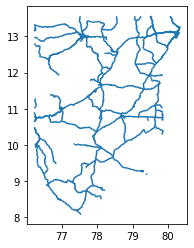

In [50]:
data3 = gpd.read_file("D:\\lila visuals\\railway\\Railways.shp")
data3 = data3.to_crs(epsg =4326)
data3.plot()

overlaying the separated shape files with the district shape file

In [51]:
merge_data1 = overlay(data1,df1,how ="intersection")
merge_data1 = merge_data1.to_crs(epsg =4326)
merge_data2 = overlay(data2,df1,how ="intersection")
merge_data2 = merge_data2.to_crs(epsg =4326)
merge_data3 = overlay(data3,df1,how ="intersection")
merge_data3 = merge_data3.to_crs(epsg =4326)

<AxesSubplot:>

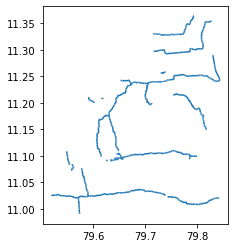

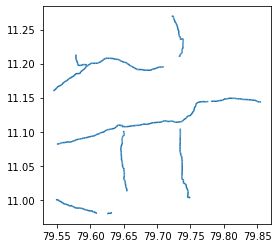

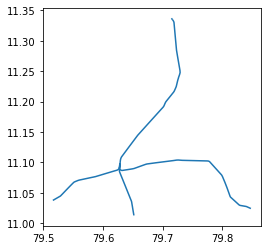

In [52]:
merge_data1.plot()
merge_data2.plot()
merge_data3.plot()

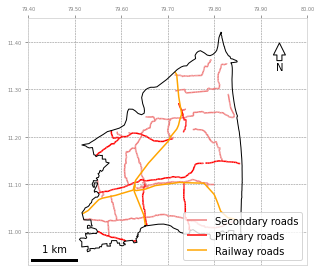

In [53]:
df1 = df1.to_crs(epsg = 4326)
ax = df1.plot(figsize=(5,5),color="none",zorder=3)
x =merge_data1.plot(color="lightcoral",label ="Secondary roads",ax =ax)
y = merge_data2.plot(color="red",label ="Primary roads",ax=ax)
z = merge_data3.plot(color="orange",label ="Railway roads",ax=ax)
# addlabels(x="primary",y ="secondary")
ax.xaxis.tick_top()
plt.xlim(79.40,80.00)
plt.ylim(10.93,11.45)
plt.grid(color="grey",linestyle = '--', linewidth = 0.5)
plt.legend(loc='lower right')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.add_artist(ScaleBar(10000,location='lower left',scale_loc='top'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f')) #axis value formatting for both axis
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.tick_params(axis='x', labelsize=5)  #reducing the size of the axis values
ax.tick_params(axis='y', labelsize=5)
x1, y1, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x1, y1), xytext=(x1, y1-arrow_length),
            arrowprops=dict(facecolor='none', width=5, headwidth=12),
            ha='center', va='center', fontsize=10,
            xycoords=ax.transAxes)
ax.spines['bottom'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey') 
ax.spines['right'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
plt.savefig("roadway.jpg",dpi =1500)
plt.show()

importing the water shape file (overall TN) and overlaying with the district shape file

In [54]:
water = gpd.read_file("D:\\lila\\water_TN.shp")
water = water.to_crs(epsg = 4326)
water_merge = overlay(water,df1,how ="intersection")

In [55]:
# from matplotlib.ticker import FormatStrFormatter

plotting the waterbodies shape files 

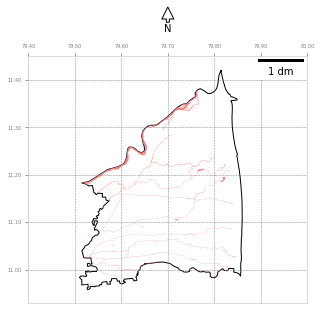

In [56]:
ax = df1.plot(figsize=(5,5),color="none",zorder=1)
x =water_merge.plot(color="lightcoral",ax =ax)
ax.xaxis.tick_top()
plt.xlim(79.40,80.00)
plt.ylim(10.93,11.45)
plt.grid(color="grey",linestyle = '--', linewidth = 0.50)
# plt.legend(loc='lower right')
# plt.ticklabel_format(axis="both")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.add_artist(ScaleBar(1))
ax.tick_params(axis='x', labelsize=5)
ax.tick_params(axis='y', labelsize=5)
x1, y1, arrow_length = 0.5, 1.2, 0.09
ax.annotate('N', xy=(x1, y1), xytext=(x1, y1-arrow_length),
            arrowprops=dict(facecolor='none', width=3, headwidth=12),
            ha='center', va='center', fontsize=10,
            xycoords=ax.transAxes)
ax.spines['bottom'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey') 
ax.spines['right'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
plt.savefig("water.jpg",dpi =1500)
plt.show()

In [57]:
raster = rasterio.open("D:\\lila visuals\\GHI_Nagapattinam.tif")

In [58]:
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': 1.1754943508222875e-38,
 'width': 142,
 'height': 189,
 'count': 1,
 'crs': CRS.from_epsg(32644),
 'transform': Affine(268.00554929577464, 0.0, 337343.3605,
        0.0, -268.00554920634914, 1262584.7596)}

In [59]:
# raster = raster.rio.reproject("EPSG:4326")

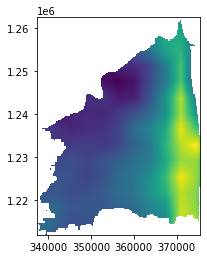

<AxesSubplot:>

In [60]:
from rasterio.plot import show
show(raster)

land cover high, med, low

In [61]:
lc_high = gpd.read_file("D:\\lila visuals\\solar\\_rl_elev_rd_wat_co_trans_ar_sub_rdpx_trsub_trat_subat_rdat_ir_high\\LC_Solar_final_area_mask_1_Nagapattinam.shp")
lc_high =lc_high.to_crs(epsg =4326)

In [62]:
lc_med = gpd.read_file("D:\\lila visuals\\solar\\_rl_elev_rd_wat_co_trans_ar_sub_rdpx_trsub_trat_subat_rdat_ir_medatt\\LC_Solar_final_area_mask_1_Nagapattinam.shp")
lc_med =lc_med.to_crs(epsg =4326)

In [63]:
lc_low = gpd.read_file("D:\\lila visuals\\solar\\_rl_elev_rd_wat_trans_ar_sub_rdpx_trsub_low\\LC_Solar_final_area_mask_1_Nagapattinam.shp")
lc_low = lc_low.to_crs(epsg =4326)

In [64]:
merge_lc1 = overlay(lc_high,df1,how ="intersection")
merge_lc1 = merge_lc1.to_crs(epsg =4326)
merge_lc2 = overlay(lc_med,df1,how ="intersection")
merge_lc2 = merge_lc2.to_crs(epsg =4326)
merge_lc3 = overlay(lc_low,df1,how ="intersection")
merge_lc3 = merge_lc3.to_crs(epsg =4326)

In [65]:
merge_lc3.head()

,LandClass,area_sqkm,minDistRd,DISTRICT_1,STATE_1,area_acres,area_class,Index,AREA,PERIMETER,DISTRICT_,DISTRICT_I,DCODE,DISTRICT_2,SCODE,STATE_2,SDCODE,AREAHA,geometry
0,1.0,0.022709,0.0,Nagapattinam,Tamil Nadu,5.611625,A,0,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,"POLYGON ((79.77111 11.38106, 79.77129 11.38106..."
1,1.0,0.017369,0.0,Nagapattinam,Tamil Nadu,4.291994,D,1,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,"POLYGON ((79.77350 11.37962, 79.77350 11.37908..."
2,1.0,0.049206,0.0,Nagapattinam,Tamil Nadu,12.158982,A,2,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,"POLYGON ((79.77076 11.37798, 79.77186 11.37799..."
3,1.0,0.021603,0.0,Nagapattinam,Tamil Nadu,5.338090,A,3,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,"POLYGON ((79.80340 11.37287, 79.80322 11.37287..."
4,1.0,0.026803,0.0,Nagapattinam,Tamil Nadu,6.623185,A,4,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,"POLYGON ((79.77627 11.37403, 79.77664 11.37403..."


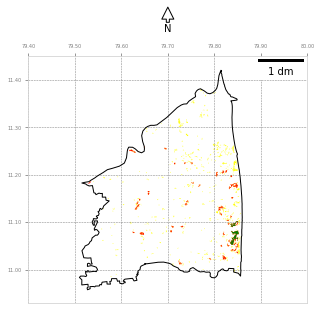

In [67]:
ax = df1.plot(figsize=(5,5),color="none",zorder=3)
x = merge_lc3.plot(color="yellow",ax =ax)
y = merge_lc2.plot(color="red",ax =ax)
z = merge_lc1.plot(color="green",ax =ax)
ax.xaxis.tick_top()
plt.xlim(79.40,80.00)
plt.ylim(10.93,11.45)
plt.grid(color="grey",linestyle = '--', linewidth = 0.50)
# plt.legend(loc="lower right")
plt.ticklabel_format(axis="both")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.add_artist(ScaleBar(1))
ax.tick_params(axis='x', labelsize=5)
ax.tick_params(axis='y', labelsize=5)
x1, y1, arrow_length = 0.5, 1.2, 0.09
ax.annotate('N', xy=(x1, y1), xytext=(x1, y1-arrow_length),
            arrowprops=dict(facecolor='none', width=3, headwidth=12),
            ha='center', va='center', fontsize=10,
            xycoords=ax.transAxes)
ax.spines['bottom'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey') 
ax.spines['right'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
plt.savefig("lc.jpg",dpi =1500)
# plt.axis('off')
plt.show()

In [68]:
lc_tif = gpd.read_file("D:\\lila visuals\\Trial.geojson")

<AxesSubplot:>

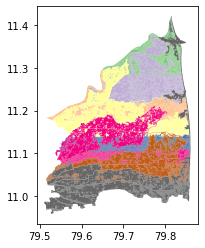

In [69]:
lc_tif.plot(cmap="Accent")

In [98]:
lc_tif.head()

,fid,DN,geometry
0,1,2,"POLYGON ((79.81332 11.41180, 79.81369 11.41180..."
1,2,2,"POLYGON ((79.81278 11.41071, 79.81278 11.41053..."
2,3,2,"POLYGON ((79.81259 11.41035, 79.81260 11.40980..."
3,4,2,"POLYGON ((79.81315 11.40800, 79.81315 11.40782..."
4,5,5,"POLYGON ((79.81298 11.40655, 79.81298 11.40637..."


In [70]:
lc_tif.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 174010 entries, 0 to 174009
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   fid       174010 non-null  int64   
 1   DN        174010 non-null  int64   
 2   geometry  174010 non-null  geometry
dtypes: geometry(1), int64(2)
memory usage: 4.0 MB


In [71]:
lc_tif["DN"].value_counts()

2     61126
1     33367
4     28270
3     26842
6     16001
5      5677
0      2635
50       92
Name: DN, dtype: int64

In [72]:
lc_tif.shape

(174010, 3)

In [98]:
lc_tech = gpd.read_file("D:\\lila visuals\\solar\\_rl_elev_rd_wat_co_trans_ar_sub_rdpx_trsub_tech\\LC_Solar_final_area_mask_1_Nagapattinam.shp")
lc_tech =lc_tech.to_crs(epsg =4326)

In [97]:
lc_theo = gpd.read_file("D:\\lila visuals\\solar\\_rl_elev_rd_wat_co_th\\LC_Solar_final_mask_val_1_Nagapattinam.shp")
lc_theo =lc_theo.to_crs(epsg =4326)

In [99]:
lc_barren = gpd.read_file("D:\\lila visuals\\solar\\all_lands_barren\\all_BarrenLands_Mayu.shp")
lc_barren =lc_barren.to_crs(epsg =4326)

<AxesSubplot:>

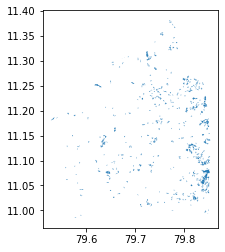

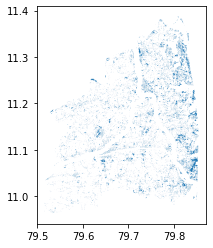

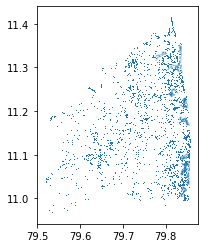

In [101]:
lc_tech.plot()
lc_theo.plot()
lc_barren.plot()

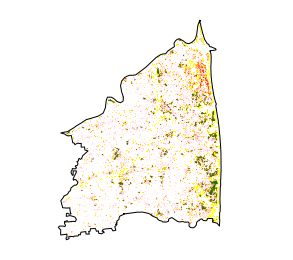

In [107]:
ax = df1.plot(figsize=(5,5),color="none",zorder=3)
x = lc_barren.plot(color="yellow",ax =ax)
y = lc_theo.plot(color="red",ax =ax)
z = lc_tech.plot(color="green",ax =ax)
# ax.xaxis.tick_top()
plt.xlim(79.40,80.00)
plt.ylim(10.93,11.45)
# plt.grid(color="grey",linestyle = '--', linewidth = 0.50)
# # plt.legend(loc="lower right")
# plt.ticklabel_format(axis="both")
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.tick_params(axis='x', colors='grey')
# ax.tick_params(axis='y', colors='grey')
# ax.add_artist(ScaleBar(1))
# ax.tick_params(axis='x', labelsize=5)
# ax.tick_params(axis='y', labelsize=5)
# x1, y1, arrow_length = 0.5, 1.2, 0.09
# ax.annotate('N', xy=(x1, y1), xytext=(x1, y1-arrow_length),
#             arrowprops=dict(facecolor='none', width=3, headwidth=12),
#             ha='center', va='center', fontsize=10,
#             xycoords=ax.transAxes)
# ax.spines['bottom'].set_color('lightgrey')
# ax.spines['top'].set_color('lightgrey') 
# ax.spines['right'].set_color('lightgrey')
# ax.spines['left'].set_color('lightgrey')
# plt.savefig("lc.jpg",dpi =1500)
plt.axis('off')
plt.show()

In [108]:
lc_theo = gpd.read_file("D:\\lila visuals\\solar\\_rl_elev_rd_wat_co_th\\LC_Solar_final_mask_val_1_Nagapattinam.shp")
lc_theo =lc_theo.to_crs(epsg =4326)

In [114]:
lc_theo.head(50)

,LandClass,DISTRICT,STATE,area_sqkm,area_acres,area_class,Index,geometry
0,1.0,Nagapattinam,Tamil Nadu,0.000400,0.098854,D,0,"POLYGON ((79.80884 11.38773, 79.80884 11.38754..."
1,1.0,Nagapattinam,Tamil Nadu,0.000400,0.098854,D,1,"POLYGON ((79.80867 11.38429, 79.80867 11.38411..."
2,1.0,Nagapattinam,Tamil Nadu,0.024803,6.128918,A,2,"POLYGON ((79.80866 11.38754, 79.80866 11.38718..."
3,1.0,Nagapattinam,Tamil Nadu,0.000400,0.098854,D,3,"POLYGON ((79.81381 11.38322, 79.81381 11.38304..."
4,1.0,Nagapattinam,Tamil Nadu,0.000400,0.098854,D,4,"POLYGON ((79.81583 11.38269, 79.81583 11.38251..."
5,1.0,Nagapattinam,Tamil Nadu,0.000400,0.098854,D,5,"POLYGON ((79.81711 11.38251, 79.81711 11.38233..."
6,1.0,Nagapattinam,Tamil Nadu,0.008401,2.075924,D,6,"POLYGON ((79.81527 11.38287, 79.81528 11.38269..."
7,1.0,Nagapattinam,Tamil Nadu,0.002800,0.691975,D,7,"POLYGON ((79.81601 11.38251, 79.81601 11.38215..."
8,1.0,Nagapattinam,Tamil Nadu,0.000400,0.098854,D,8,"POLYGON ((79.81729 11.38233, 79.81729 11.38215..."
9,1.0,Nagapattinam,Tamil Nadu,0.000400,0.098854,D,9,"POLYGON ((79.81363 11.38214, 79.81363 11.38196..."


AttributeError: 'GeoDataFrame' object has no attribute 'uique'

In [111]:
lc_theo.columns

Index(['LandClass', 'DISTRICT', 'STATE', 'area_sqkm', 'area_acres',
       'area_class', 'Index', 'geometry'],
      dtype='object')